In [1]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
import torch
import glob

In [11]:
class CustomDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        self.img_labels = self._get_annotation(img_dir)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = self._get_img_path(self.img_dir)[idx]
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform :
            image = self.transform(image)
        if self.target_transform :
            label = self.target_transform(label)
        return image, label
    
    def _get_annotation(self, img_dir):
        img_path_list = glob.glob(os.path.join(img_dir, '*.png'))
        img_path_list.sort()
        img_names = [img_path.split('/')[-1].split('.')[0] for img_path in img_path_list]
        return img_names
    
    def _get_img_path(self, img_dir):
        img_path_list = glob.glob(os.path.join(img_dir, '*.png'))
        img_path_list.sort()
        return img_path_list
    
    def _print(self):
        print('hello')


In [3]:
IMG_PATH = '/Users/j/Desktop/FFlounge230117/230117_1_2048x2048'
customdataset = CustomDataset(img_dir = IMG_PATH)

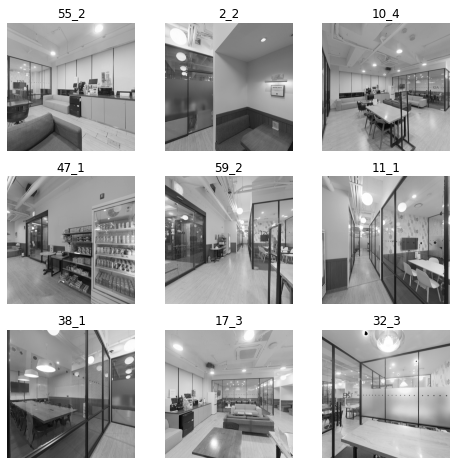

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(customdataset), size=(1,)).item()
    img, label = customdataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    RGB_img = cv2.cvtColor(np.array(img[0]), cv2.COLOR_BGR2RGB)
    ## 여기 왜 흑백이지?
    plt.imshow(RGB_img)
plt.show()

In [8]:
RGB_img = cv2.cvtColor(np.array(customdataset[0][0]), cv2.COLOR_BGR2RGB)
np.shape(RGB_img)

(3, 2048, 3)

In [6]:
torch.Tensor.size(customdataset[0][0])
np.shape(np.array(customdataset[0][0]))

(3, 2048, 2048)